In [2]:
import nibabel as nib
import os
import numpy as np
import torch
import tqdm
from sklearn.metrics import confusion_matrix

total_cm = np.zeros((4, 4), dtype=np.int)


directory = "/home/mkhanmhmdi/Desktop/UOT/nnunet results brats/validation"  # Replace with the desired directory path
files = os.listdir(directory)
wrong_predict_labels_dist = []
temp_wrong_labels = []
for file in tqdm.tqdm(files):
    try:
        print('hi')
        
        ground_truth_path = f"/home/mkhanmhmdi/Desktop/UOT/nnunet results brats/gt_segmentations/{file}"
        predicted_path = os.path.join(directory, file)
        try:
            ground_truth_data = nib.load(ground_truth_path).get_fdata()
            predicted_data = nib.load(predicted_path).get_fdata()
        except:
            continue
        affine = np.array([[ -1.,  -0.,  -0.,   0.],
                           [ -0.,  -1.,  -0., 239.],
                           [  0.,   0.,   1.,   0.],
                           [  0.,   0.,   0.,   1.]])
        
        transform_data_img = nib.Nifti1Image(np.array(abs(ground_truth_data - predicted_data)), affine)
        nib.save(transform_data_img, '/home/mkhanmhmdi/Desktop/UOT/nnunet results brats/differences_3d/diff_{}.nii.gz'.format(file))
        
        unique_labels = [0,1,2,3]
        
        batch_cm = confusion_matrix(predicted_data.reshape(-1),ground_truth_data.reshape(-1))
#         print(batch_cm)
        total_cm += batch_cm
        # Iterate over each label and find the wrong indices
        wrong_indices = {}
        temp_wrong_labels = []

        for label in unique_labels:
            incorrect_indices = np.where((predicted_data != ground_truth_data) & (ground_truth_data == label))
            incorrect_labels = predicted_data[incorrect_indices]
            label_0 = np.count_nonzero(incorrect_labels == 0)
            label_1 = np.count_nonzero(incorrect_labels == 1)
            label_2 = np.count_nonzero(incorrect_labels == 2)
            label_3 = np.count_nonzero(incorrect_labels == 3)
            
            temp_wrong_labels.append([label_0, label_1, label_2, label_3])
            
            wrong_indices[label] = incorrect_indices
        wrong_predict_labels_dist.append(temp_wrong_labels)

    except:
        continue

/tmp/ipykernel_24395/2336193770.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  total_cm = np.zeros((4, 4), dtype=np.int)
  0%|          | 0/299 [00:00<?, ?it/s]

hi
hi
hi


  1%|          | 3/299 [00:04<06:53,  1.40s/it]

hi
hi
hi


  2%|▏         | 6/299 [00:08<07:06,  1.46s/it]

hi


  2%|▏         | 7/299 [00:12<09:55,  2.04s/it]

hi


  3%|▎         | 8/299 [00:16<12:19,  2.54s/it]

hi


  3%|▎         | 9/299 [00:21<14:10,  2.93s/it]

hi


  3%|▎         | 10/299 [00:25<15:40,  3.26s/it]

hi
hi


  4%|▍         | 12/299 [00:29<13:11,  2.76s/it]

hi


  4%|▍         | 13/299 [00:33<14:43,  3.09s/it]

hi


  5%|▍         | 14/299 [00:37<15:56,  3.35s/it]

hi


  5%|▌         | 15/299 [00:41<16:57,  3.58s/it]

hi


  5%|▌         | 16/299 [00:46<17:44,  3.76s/it]

hi
hi
hi


  6%|▋         | 19/299 [00:50<11:36,  2.49s/it]

hi


  7%|▋         | 20/299 [00:54<13:12,  2.84s/it]

hi


  7%|▋         | 21/299 [00:58<14:41,  3.17s/it]

hi


  7%|▋         | 22/299 [01:03<15:59,  3.46s/it]

hi


  8%|▊         | 23/299 [01:07<17:00,  3.70s/it]

hi


  8%|▊         | 24/299 [01:11<17:44,  3.87s/it]

hi
hi
hi


  9%|▉         | 27/299 [01:16<11:37,  2.56s/it]

hi


  9%|▉         | 28/299 [01:20<13:16,  2.94s/it]

hi


 10%|▉         | 29/299 [01:24<14:37,  3.25s/it]

hi
hi


 10%|█         | 31/299 [01:29<12:39,  2.83s/it]

hi


 11%|█         | 32/299 [01:33<14:02,  3.16s/it]

hi


 11%|█         | 33/299 [01:37<15:13,  3.44s/it]

hi


 11%|█▏        | 34/299 [01:42<16:10,  3.66s/it]

hi


 12%|█▏        | 35/299 [01:46<17:01,  3.87s/it]

hi


 12%|█▏        | 36/299 [01:51<17:31,  4.00s/it]

hi
hi


 13%|█▎        | 38/299 [01:55<13:52,  3.19s/it]

hi


 13%|█▎        | 39/299 [01:59<14:59,  3.46s/it]

hi


 13%|█▎        | 40/299 [02:04<15:53,  3.68s/it]

hi


 14%|█▎        | 41/299 [02:08<16:51,  3.92s/it]

hi


 14%|█▍        | 42/299 [02:13<17:33,  4.10s/it]

hi


 14%|█▍        | 43/299 [02:17<18:00,  4.22s/it]

hi


 15%|█▍        | 44/299 [02:22<18:22,  4.32s/it]

hi


 15%|█▌        | 45/299 [02:26<18:32,  4.38s/it]

hi


 15%|█▌        | 46/299 [02:31<18:35,  4.41s/it]

hi


 16%|█▌        | 47/299 [02:35<18:36,  4.43s/it]

hi


 16%|█▌        | 48/299 [02:40<18:44,  4.48s/it]

hi


 16%|█▋        | 49/299 [02:44<18:45,  4.50s/it]

hi


 17%|█▋        | 50/299 [02:49<18:38,  4.49s/it]

hi


 17%|█▋        | 51/299 [02:53<18:35,  4.50s/it]

hi
hi


 18%|█▊        | 53/299 [02:58<14:13,  3.47s/it]

hi


 18%|█▊        | 54/299 [03:02<15:10,  3.72s/it]

hi


 18%|█▊        | 55/299 [03:07<15:55,  3.92s/it]

hi


 19%|█▊        | 56/299 [03:11<16:33,  4.09s/it]

hi
hi


 19%|█▉        | 58/299 [03:16<13:11,  3.28s/it]

hi


 20%|█▉        | 59/299 [03:20<14:16,  3.57s/it]

hi


 20%|██        | 60/299 [03:25<15:11,  3.81s/it]

hi


 20%|██        | 61/299 [03:29<15:49,  3.99s/it]

hi


 21%|██        | 62/299 [03:34<16:17,  4.12s/it]

hi


 21%|██        | 63/299 [03:38<16:39,  4.23s/it]

hi


 21%|██▏       | 64/299 [03:43<16:54,  4.32s/it]

hi


 22%|██▏       | 65/299 [03:47<17:01,  4.37s/it]

hi


 22%|██▏       | 66/299 [03:52<17:05,  4.40s/it]

hi
hi


 23%|██▎       | 68/299 [03:56<13:10,  3.42s/it]

hi


 23%|██▎       | 69/299 [04:01<14:11,  3.70s/it]

hi
hi


 24%|██▎       | 71/299 [04:06<11:48,  3.11s/it]

hi


 24%|██▍       | 72/299 [04:10<12:59,  3.44s/it]

hi


 24%|██▍       | 73/299 [04:15<13:57,  3.71s/it]

hi


 25%|██▍       | 74/299 [04:19<14:40,  3.91s/it]

hi


 25%|██▌       | 75/299 [04:24<15:10,  4.06s/it]

hi


 25%|██▌       | 76/299 [04:28<15:32,  4.18s/it]

hi
hi


 26%|██▌       | 78/299 [04:33<12:17,  3.34s/it]

hi


 26%|██▋       | 79/299 [04:37<13:14,  3.61s/it]

hi


 27%|██▋       | 80/299 [04:41<13:42,  3.75s/it]

hi


 27%|██▋       | 81/299 [04:45<14:06,  3.88s/it]

hi


 27%|██▋       | 82/299 [04:50<14:22,  3.97s/it]

hi


 28%|██▊       | 83/299 [04:54<14:35,  4.05s/it]

hi


 28%|██▊       | 84/299 [04:58<14:50,  4.14s/it]

hi
hi


 29%|██▉       | 86/299 [05:02<11:25,  3.22s/it]

hi


 29%|██▉       | 87/299 [05:07<12:15,  3.47s/it]

hi


 29%|██▉       | 88/299 [05:11<12:57,  3.68s/it]

hi


 30%|██▉       | 89/299 [05:15<13:34,  3.88s/it]

hi


 30%|███       | 90/299 [05:20<14:03,  4.04s/it]

hi


 30%|███       | 91/299 [05:24<14:18,  4.13s/it]

hi


 31%|███       | 92/299 [05:29<14:27,  4.19s/it]

hi


 31%|███       | 93/299 [05:33<14:34,  4.25s/it]

hi


 31%|███▏      | 94/299 [05:37<14:37,  4.28s/it]

hi


 32%|███▏      | 95/299 [05:42<14:36,  4.30s/it]

hi


 32%|███▏      | 96/299 [05:46<14:33,  4.31s/it]

hi
hi


 33%|███▎      | 98/299 [05:50<11:10,  3.34s/it]

hi


 33%|███▎      | 99/299 [05:55<11:57,  3.59s/it]

hi


 33%|███▎      | 100/299 [05:59<12:34,  3.79s/it]

hi


 34%|███▍      | 101/299 [06:04<13:10,  3.99s/it]

hi


 34%|███▍      | 102/299 [06:08<13:42,  4.17s/it]

hi


 34%|███▍      | 103/299 [06:13<13:57,  4.27s/it]

hi


 35%|███▍      | 104/299 [06:17<14:07,  4.34s/it]

hi


 35%|███▌      | 105/299 [06:22<14:13,  4.40s/it]

hi


 35%|███▌      | 106/299 [06:26<14:15,  4.43s/it]

hi


 36%|███▌      | 107/299 [06:31<14:16,  4.46s/it]

hi


 36%|███▌      | 108/299 [06:35<14:04,  4.42s/it]

hi


 36%|███▋      | 109/299 [06:40<14:09,  4.47s/it]

hi


 37%|███▋      | 110/299 [06:44<14:08,  4.49s/it]

hi


 37%|███▋      | 111/299 [06:49<13:53,  4.44s/it]

hi


 37%|███▋      | 112/299 [06:53<13:44,  4.41s/it]

hi


 38%|███▊      | 113/299 [06:57<13:37,  4.40s/it]

hi


 38%|███▊      | 114/299 [07:02<13:30,  4.38s/it]

hi


 38%|███▊      | 115/299 [07:06<13:33,  4.42s/it]

hi


 39%|███▉      | 116/299 [07:11<13:37,  4.47s/it]

hi


 39%|███▉      | 117/299 [07:15<13:35,  4.48s/it]

hi


 39%|███▉      | 118/299 [07:20<13:35,  4.50s/it]

hi
hi


 40%|████      | 120/299 [07:24<10:21,  3.47s/it]

hi


 40%|████      | 121/299 [07:29<11:01,  3.71s/it]

hi


 41%|████      | 122/299 [07:33<11:31,  3.91s/it]

hi


 41%|████      | 123/299 [07:38<11:50,  4.04s/it]

hi
hi


 42%|████▏     | 125/299 [07:42<09:25,  3.25s/it]

hi


 42%|████▏     | 126/299 [07:47<10:10,  3.53s/it]

hi


 42%|████▏     | 127/299 [07:51<10:44,  3.75s/it]

hi


 43%|████▎     | 128/299 [07:55<11:10,  3.92s/it]

hi


 43%|████▎     | 129/299 [08:00<11:37,  4.10s/it]

hi


 43%|████▎     | 130/299 [08:05<11:54,  4.23s/it]

hi
hi


 44%|████▍     | 132/299 [08:09<09:21,  3.36s/it]

hi


 44%|████▍     | 133/299 [08:14<10:04,  3.64s/it]

hi


 45%|████▍     | 134/299 [08:18<10:37,  3.87s/it]

hi


 45%|████▌     | 135/299 [08:23<11:01,  4.03s/it]

hi


 45%|████▌     | 136/299 [08:27<11:18,  4.16s/it]

hi


 46%|████▌     | 137/299 [08:32<11:31,  4.27s/it]

hi
hi


 46%|████▋     | 139/299 [08:36<08:57,  3.36s/it]

hi
hi


 47%|████▋     | 141/299 [08:41<07:42,  2.93s/it]

hi
hi


 48%|████▊     | 143/299 [08:45<07:06,  2.73s/it]

hi
hi


 48%|████▊     | 145/299 [08:50<06:33,  2.56s/it]

hi


 49%|████▉     | 146/299 [08:54<07:26,  2.92s/it]

hi


 49%|████▉     | 147/299 [08:59<08:12,  3.24s/it]

hi


 49%|████▉     | 148/299 [09:03<08:55,  3.55s/it]

hi


 50%|████▉     | 149/299 [09:08<09:30,  3.80s/it]

hi


 50%|█████     | 150/299 [09:12<09:55,  4.00s/it]

hi


 51%|█████     | 151/299 [09:17<10:13,  4.14s/it]

hi


 51%|█████     | 152/299 [09:21<10:14,  4.18s/it]

hi
hi
hi


 52%|█████▏    | 155/299 [09:25<06:23,  2.66s/it]

hi


 52%|█████▏    | 156/299 [09:30<07:09,  3.00s/it]

hi


 53%|█████▎    | 157/299 [09:34<07:56,  3.35s/it]

hi
hi


 53%|█████▎    | 159/299 [09:39<06:47,  2.91s/it]

hi


 54%|█████▎    | 160/299 [09:43<07:31,  3.25s/it]

hi


 54%|█████▍    | 161/299 [09:48<08:09,  3.55s/it]

hi


 54%|█████▍    | 162/299 [09:52<08:40,  3.80s/it]

hi


 55%|█████▍    | 163/299 [09:56<08:55,  3.93s/it]

hi


 55%|█████▍    | 164/299 [10:01<09:00,  4.01s/it]

hi


 55%|█████▌    | 165/299 [10:05<09:07,  4.08s/it]

hi


 56%|█████▌    | 166/299 [10:09<09:13,  4.16s/it]

hi


 56%|█████▌    | 167/299 [10:13<09:13,  4.19s/it]

hi


 56%|█████▌    | 168/299 [10:18<09:14,  4.23s/it]

hi
hi


 57%|█████▋    | 170/299 [10:22<07:04,  3.29s/it]

hi


 57%|█████▋    | 171/299 [10:26<07:32,  3.54s/it]

hi


 58%|█████▊    | 172/299 [10:31<07:54,  3.73s/it]

hi


 58%|█████▊    | 173/299 [10:35<08:09,  3.88s/it]

hi


 58%|█████▊    | 174/299 [10:39<08:22,  4.02s/it]

hi
hi


 59%|█████▉    | 176/299 [10:44<06:31,  3.19s/it]

hi


 59%|█████▉    | 177/299 [10:48<07:02,  3.46s/it]

hi


 60%|█████▉    | 178/299 [10:52<07:26,  3.69s/it]

hi


 60%|█████▉    | 179/299 [10:57<07:54,  3.95s/it]

hi


 60%|██████    | 180/299 [11:01<08:04,  4.07s/it]

hi


 61%|██████    | 181/299 [11:06<08:10,  4.16s/it]

hi


 61%|██████    | 182/299 [11:10<08:12,  4.21s/it]

hi


 61%|██████    | 183/299 [11:15<08:17,  4.29s/it]

hi


 62%|██████▏   | 184/299 [11:19<08:17,  4.33s/it]

hi


 62%|██████▏   | 185/299 [11:23<08:17,  4.36s/it]

hi


 62%|██████▏   | 186/299 [11:28<08:20,  4.43s/it]

hi
hi


 63%|██████▎   | 188/299 [11:33<06:21,  3.44s/it]

hi
hi
hi


 64%|██████▍   | 191/299 [11:37<04:27,  2.48s/it]

hi


 64%|██████▍   | 192/299 [11:42<05:07,  2.87s/it]

hi


 65%|██████▍   | 193/299 [11:46<05:37,  3.19s/it]

hi


 65%|██████▍   | 194/299 [11:50<05:59,  3.43s/it]

hi


 65%|██████▌   | 195/299 [11:55<06:21,  3.66s/it]

hi
hi


 66%|██████▌   | 197/299 [11:59<05:10,  3.04s/it]

hi


 66%|██████▌   | 198/299 [12:03<05:35,  3.32s/it]

hi


 67%|██████▋   | 199/299 [12:08<06:00,  3.60s/it]

hi


 67%|██████▋   | 200/299 [12:12<06:17,  3.82s/it]

hi


 67%|██████▋   | 201/299 [12:17<06:31,  4.00s/it]

hi


 68%|██████▊   | 202/299 [12:21<06:37,  4.10s/it]

hi


 68%|██████▊   | 203/299 [12:25<06:40,  4.17s/it]

hi


 68%|██████▊   | 204/299 [12:30<06:42,  4.24s/it]

hi
hi


 69%|██████▉   | 206/299 [12:34<05:08,  3.31s/it]

hi


 69%|██████▉   | 207/299 [12:38<05:29,  3.58s/it]

hi


 70%|██████▉   | 208/299 [12:43<05:45,  3.80s/it]

hi


 70%|██████▉   | 209/299 [12:47<05:59,  4.00s/it]

hi


 70%|███████   | 210/299 [12:52<06:09,  4.15s/it]

hi
hi


 71%|███████   | 212/299 [12:57<04:48,  3.31s/it]

hi


 71%|███████   | 213/299 [13:01<05:10,  3.61s/it]

hi


 72%|███████▏  | 214/299 [13:05<05:19,  3.76s/it]

hi


 72%|███████▏  | 215/299 [13:10<05:28,  3.91s/it]

hi


 72%|███████▏  | 216/299 [13:14<05:32,  4.00s/it]

hi


 73%|███████▎  | 217/299 [13:18<05:35,  4.09s/it]

hi


 73%|███████▎  | 218/299 [13:22<05:35,  4.15s/it]

hi


 73%|███████▎  | 219/299 [13:27<05:35,  4.19s/it]

hi
hi


 74%|███████▍  | 221/299 [13:31<04:14,  3.26s/it]

hi
hi


 75%|███████▍  | 223/299 [13:35<03:36,  2.85s/it]

hi


 75%|███████▍  | 224/299 [13:40<03:59,  3.19s/it]

hi


 75%|███████▌  | 225/299 [13:44<04:15,  3.45s/it]

hi


 76%|███████▌  | 226/299 [13:49<04:32,  3.73s/it]

hi


 76%|███████▌  | 227/299 [13:53<04:42,  3.93s/it]

hi


 76%|███████▋  | 228/299 [13:58<04:47,  4.05s/it]

hi


 77%|███████▋  | 229/299 [14:02<04:50,  4.15s/it]

hi


 77%|███████▋  | 230/299 [14:06<04:50,  4.22s/it]

hi


 77%|███████▋  | 231/299 [14:11<04:49,  4.26s/it]

hi
hi
hi


 78%|███████▊  | 234/299 [14:15<02:56,  2.71s/it]

hi
hi
hi


 79%|███████▉  | 237/299 [14:19<02:13,  2.15s/it]

hi


 80%|███████▉  | 238/299 [14:24<02:35,  2.55s/it]

hi


 80%|███████▉  | 239/299 [14:28<02:54,  2.91s/it]

hi


 80%|████████  | 240/299 [14:33<03:10,  3.23s/it]

hi


 81%|████████  | 241/299 [14:37<03:23,  3.51s/it]

hi


 81%|████████  | 242/299 [14:41<03:33,  3.74s/it]

hi


 81%|████████▏ | 243/299 [14:46<03:40,  3.94s/it]

hi


 82%|████████▏ | 244/299 [14:50<03:43,  4.07s/it]

hi
hi


 82%|████████▏ | 246/299 [14:55<02:52,  3.26s/it]

hi


 83%|████████▎ | 247/299 [14:59<03:03,  3.53s/it]

hi


 83%|████████▎ | 248/299 [15:03<03:10,  3.74s/it]

hi


 83%|████████▎ | 249/299 [15:08<03:15,  3.91s/it]

hi


 84%|████████▎ | 250/299 [15:12<03:18,  4.06s/it]

hi


 84%|████████▍ | 251/299 [15:17<03:19,  4.15s/it]

hi


 84%|████████▍ | 252/299 [15:21<03:18,  4.23s/it]

hi


 85%|████████▍ | 253/299 [15:26<03:17,  4.29s/it]

hi


 85%|████████▍ | 254/299 [15:30<03:14,  4.32s/it]

hi


 85%|████████▌ | 255/299 [15:34<03:11,  4.34s/it]

hi
hi


 86%|████████▌ | 257/299 [15:39<02:20,  3.35s/it]

hi


 86%|████████▋ | 258/299 [15:43<02:28,  3.62s/it]

hi


 87%|████████▋ | 259/299 [15:48<02:32,  3.82s/it]

hi


 87%|████████▋ | 260/299 [15:52<02:34,  3.96s/it]

hi


 87%|████████▋ | 261/299 [15:56<02:35,  4.10s/it]

hi


 88%|████████▊ | 262/299 [16:01<02:36,  4.22s/it]

hi
hi


 88%|████████▊ | 264/299 [16:05<01:56,  3.32s/it]

hi


 89%|████████▊ | 265/299 [16:10<02:01,  3.57s/it]

hi


 89%|████████▉ | 266/299 [16:14<02:04,  3.79s/it]

hi
hi


 90%|████████▉ | 268/299 [16:18<01:36,  3.11s/it]

hi


 90%|████████▉ | 269/299 [16:23<01:41,  3.39s/it]

hi


 90%|█████████ | 270/299 [16:27<01:45,  3.64s/it]

hi


 91%|█████████ | 271/299 [16:31<01:47,  3.83s/it]

hi


 91%|█████████ | 272/299 [16:36<01:47,  3.98s/it]

hi


 91%|█████████▏| 273/299 [16:40<01:46,  4.08s/it]

hi


 92%|█████████▏| 274/299 [16:45<01:44,  4.16s/it]

hi
hi


 92%|█████████▏| 276/299 [16:49<01:15,  3.28s/it]

hi


 93%|█████████▎| 277/299 [16:53<01:17,  3.54s/it]

hi


 93%|█████████▎| 278/299 [16:58<01:18,  3.74s/it]

hi


 93%|█████████▎| 279/299 [17:02<01:18,  3.92s/it]

hi


 94%|█████████▎| 280/299 [17:07<01:17,  4.10s/it]

hi


 94%|█████████▍| 281/299 [17:11<01:16,  4.23s/it]

hi


 94%|█████████▍| 282/299 [17:16<01:13,  4.31s/it]

hi


 95%|█████████▍| 283/299 [17:20<01:10,  4.38s/it]

hi


 95%|█████████▍| 284/299 [17:25<01:06,  4.42s/it]

hi


 95%|█████████▌| 285/299 [17:30<01:03,  4.53s/it]

hi


 96%|█████████▌| 286/299 [17:34<00:59,  4.60s/it]

hi


 96%|█████████▌| 287/299 [17:39<00:55,  4.62s/it]

hi


 96%|█████████▋| 288/299 [17:44<00:52,  4.76s/it]

hi
hi


 97%|█████████▋| 290/299 [17:49<00:32,  3.64s/it]

hi


 97%|█████████▋| 291/299 [17:54<00:31,  3.94s/it]

hi
hi


 98%|█████████▊| 293/299 [17:59<00:20,  3.38s/it]

hi


 98%|█████████▊| 294/299 [18:04<00:18,  3.71s/it]

hi


 99%|█████████▊| 295/299 [18:08<00:15,  3.97s/it]

hi


 99%|█████████▉| 296/299 [18:13<00:12,  4.11s/it]

hi


 99%|█████████▉| 297/299 [18:18<00:08,  4.29s/it]

hi


100%|█████████▉| 298/299 [18:22<00:04,  4.36s/it]

hi


100%|██████████| 299/299 [18:27<00:00,  3.70s/it]


In [3]:
np.save('my_array.npy', total_cm)


In [7]:
c = total_cm

In [8]:
total_cm

array([[2196222542,    1403135,      82546,      83208],
       [   1050117,   14143971,     384228,     204355],
       [     85896,     355480,    3029352,     241120],
       [     74155,     133281,     315414,    5263200]])

In [9]:
normalized_matrix = total_cm / total_cm.sum(axis=1, keepdims=True)


In [16]:
np.round(normalized_matrix * 100, 1)

array([[99.9,  0.1,  0. ,  0. ],
       [ 6.7, 89.6,  2.4,  1.3],
       [ 2.3,  9.6, 81.6,  6.5],
       [ 1.3,  2.3,  5.5, 91. ]])

In [2]:
total_cm

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [13]:
predicted_data.reshape(-1)

array([0., 0., 0., ..., 0., 0., 0.])

In [14]:
ground_truth_data.reshape(-1)

array([0., 0., 0., ..., 0., 0., 0.])

In [2]:
a = np.array(wrong_predict_labels_dist)

In [79]:
label_0_mistakes = []
label_1_mistakes = []
label_2_mistakes = []
label_3_mistakes = []

for i in a:

    

In [17]:
a

array([[[    0,  1714,     0,     1],
        [63727,     0,    28,   974],
        [   48,   167,     0,  1426],
        [ 1777,  2779,   683,     0]],

       [[    0,  1895,     0,     0],
        [  599,     0,    24,   151],
        [    0,     0,     0,    16],
        [    6,    49,     0,     0]],

       [[    0, 12915,     2,   933],
        [ 2709,     0,    67,  1525],
        [    0,    15,     0,   839],
        [ 2170,  4104,  1116,     0]],

       ...,

       [[    0,  1659,     0,     0],
        [ 1612,     0,    98,   139],
        [    0,     0,     0,    60],
        [   24,   572,    55,     0]],

       [[    0,  2829,    54,   386],
        [ 2572,     0,    72,    43],
        [    0,     0,     0,   102],
        [   19,   825,   589,     0]],

       [[    0,  1107,    18,   369],
        [ 2075,     0,   543,   372],
        [    0,  1220,     0,  1333],
        [  150,  1064,   905,     0]]])

In [15]:
a[:,:,1]

array([[ 1714,     0,   167,  2779],
       [ 1895,     0,     0,    49],
       [12915,     0,    15,  4104],
       [ 1518,     0,     9,   353],
       [16592,     0,   112,  1870],
       [ 6415,     0,  1991,  7174],
       [ 3989,     0,   138,  1274],
       [ 9698,     0,   858,  4452],
       [ 1372,     0,    32,   795],
       [ 1038,     0,   856,   111],
       [  347,     0,  2412,   226],
       [ 1735,     0,     2,   500],
       [ 2820,     0,    27,  1550],
       [ 1094,     0,     0,   240],
       [  842,     0,     2,   150],
       [ 3094,     0,    25,  1428],
       [ 1932,     0,     0,   295],
       [ 4134,     0,  2544,   239],
       [ 2059,     0,    16,   689],
       [  841,     0,    13,   290],
       [ 4132,     0,     0,  1133],
       [ 1387,     0,     0,   426],
       [ 3679,     0,   104,   882],
       [ 3654,     0,     8,   218],
       [ 1956,     0,     0,    70],
       [ 8265,     0,   695,  1258],
       [ 1143,     0,    77,  1188],
 

In [3]:
q =  ['ground', 'Whole', 'Core', 'Enhance']
for i in range(4):
    print(q[i])
    for j in range(4):
        print(q[j],"   ", (a[:, i, j]).mean())
    print("------------")

ground
ground     0.0
Whole     4208.56
Core     344.548
Enhance     296.62
------------
Whole
ground     5626.192
Whole     0.0
Core     1470.896
Enhance     533.124
------------
Core
ground     330.872
Whole     1543.052
Core     0.0
Enhance     1261.656
------------
Enhance
ground     332.832
Whole     817.42
Core     964.48
Enhance     0.0
------------


In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predicted_data.reshape(-1),ground_truth_data.reshape(-1))

array([[8776517,     851,       5,     459],
       [   2603,   70994,       8,    1508],
       [    146,     159,   36995,    1212],
       [    948,     331,     449,   34815]])

In [8]:
# confusion_matrix = {
#     'ground': [0.0, 5626.192, 330.872, 332.832],
#     'Whole': [4208.56, 0.0, 1543.052, 817.42],
#     'Core': [344.548, 1470.896, 0.0, 964.48],
#     'Enhance': [296.62, 533.124, 1261.656, 0.0]
# }

# # Calculate metrics
# metrics = {}
# for class_name, row in confusion_matrix.items():
#     true_positive = row[confusion_matrix.keys()[class_name]]
#     false_positive = sum(row) - true_positive
#     false_negative = sum(confusion_matrix[class_name]) - true_positive
#     true_negative = sum([sum(confusion_matrix[c]) - row[confusion_matrix.keys().index(class_name)] for c in confusion_matrix.keys()]) - false_negative

#     accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
#     precision = true_positive / (true_positive + false_positive)
#     recall = true_positive / (true_positive + false_negative)
#     f1_score = 2 * (precision * recall) / (precision + recall)

#     metrics[class_name] = {
#         'accuracy': accuracy,
#         'precision': precision,
#         'recall': recall,
#         'f1_score': f1_score
#     }

# # Print metrics
# for class_name, metrics_dict in metrics.items():
#     print(f"Metrics for class '{class_name}':")
#     print(f"Accuracy: {metrics_dict['accuracy']:.2f}")
#     print(f"Precision: {metrics_dict['precision']:.2f}")
#     print(f"Recall: {metrics_dict['recall']:.2f}")
#     print(f"F1-Score: {metrics_dict['f1_score']:.2f}")
#     print("="*30)


TypeError: 'dict_keys' object is not subscriptable

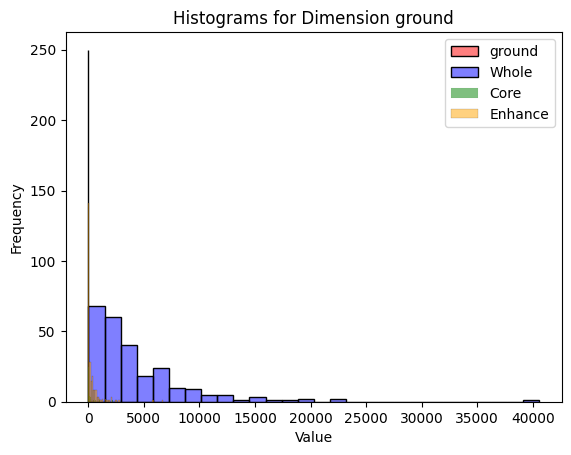

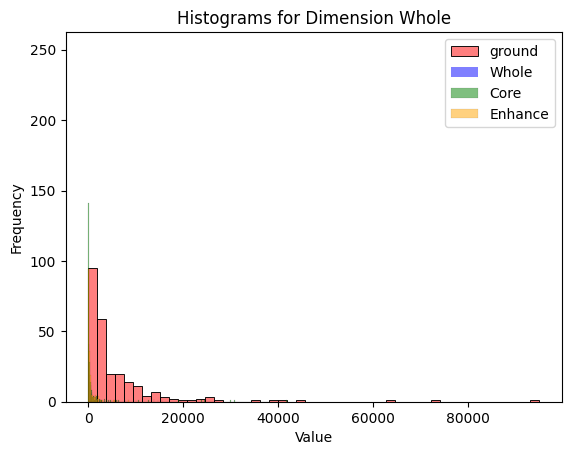

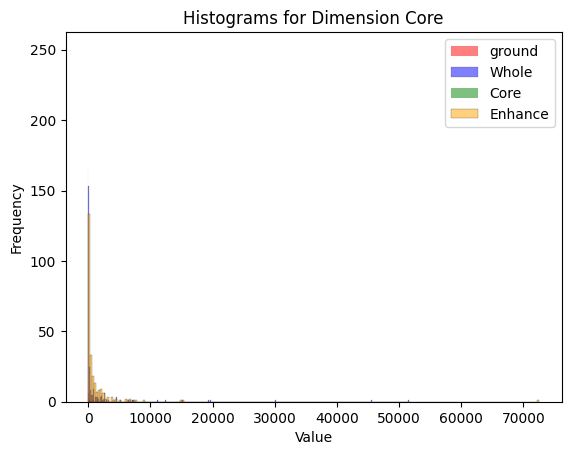

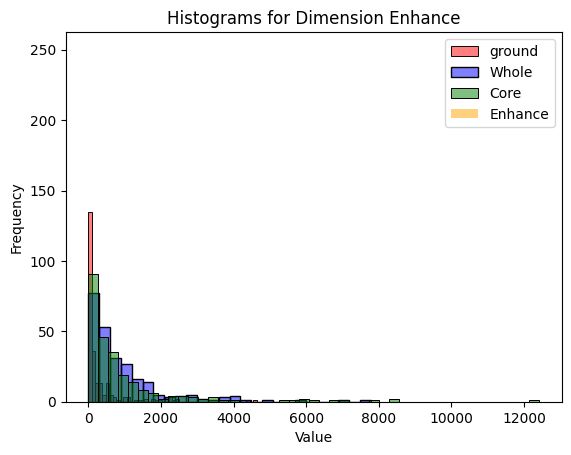

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# a = np.random.randn(100, 4, 4)  # Example data

for i, name in zip(range(4), ['ground', 'Whole', 'Core', 'Enhance']):
    # Create a figure and axis object
    fig, ax = plt.subplots()

    # Set the number of bins for the histograms
    num_bins = 5

    # Plot the histograms with different colors
    sns.histplot(a[:, i, 0], color='red', alpha=0.5, label='ground')
    sns.histplot(a[:, i, 1], color='blue', alpha=0.5, label='Whole')
    sns.histplot(a[:, i, 2], color='green', alpha=0.5, label='Core')
    sns.histplot(a[:, i, 3], color='orange', alpha=0.5, label='Enhance')

    # Add a legend
    ax.legend()

    # Set labels and title
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histograms for Dimension {name}')

    # Show the plot
    plt.show()

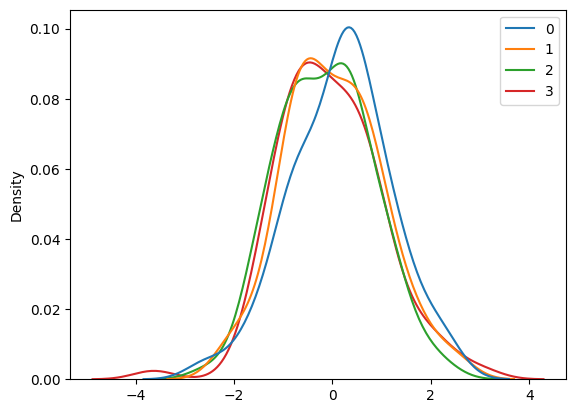

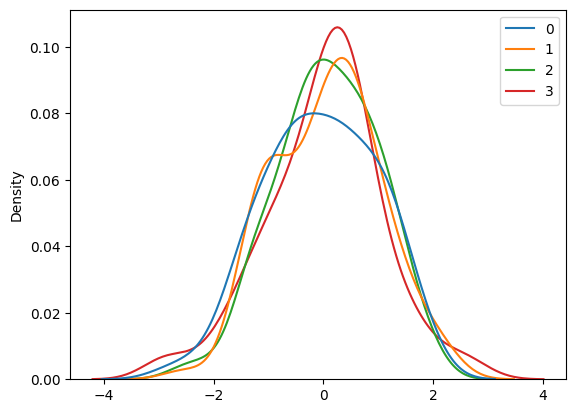

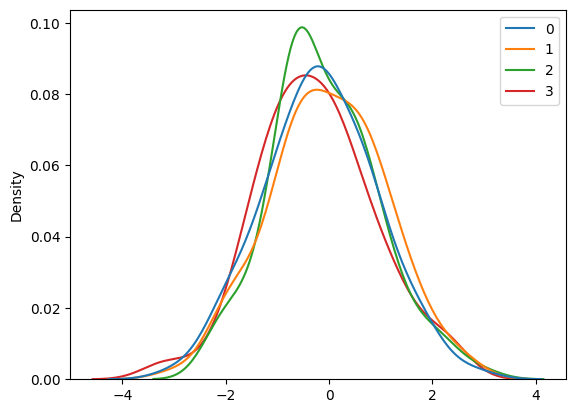

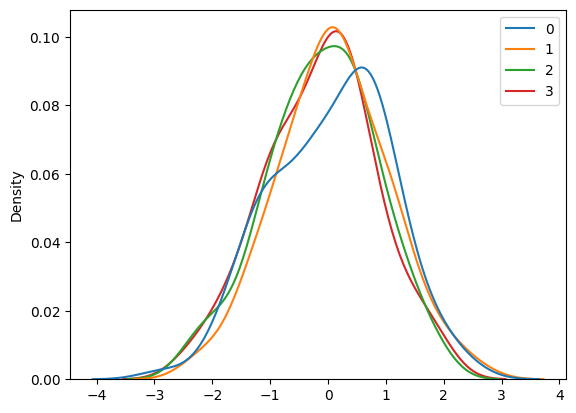

Text(0.5, 1.0, 'Kernel Density Estimation (KDE) Plot')

In [94]:
import seaborn as sns
for i in range(a.shape[1]):
    sns.kdeplot(a[:, i])
    plt.show()
ax.set_title('Kernel Density Estimation (KDE) Plot')

In [90]:
a.reshape((4,4,250))

ValueError: cannot reshape array of size 1600 into shape (4,4,250)

In [51]:
np.unique(predicted_data)

array([0., 1., 2., 3.])

In [57]:
unique_labels = np.unique(ground_truth_data)

# Iterate over each label and find the wrong indices
wrong_predict_labels_dist = []
wrong_indices = {}
temp_wrong_labels = []
for label in unique_labels:
    incorrect_indices = np.where((predicted_data != ground_truth_data) & (ground_truth_data == label))
    incorrect_labels = predicted_data[incorrect_indices]
    label_0 = np.count_nonzero(incorrect_labels == 0)
    label_1 = np.count_nonzero(incorrect_labels == 1)
    label_2 = np.count_nonzero(incorrect_labels == 2)
    label_3 = np.count_nonzero(incorrect_labels == 3)
    
    temp_wrong_labels.append([label_0, label_1, label_2, label_3])
    
    wrong_indices[label] = incorrect_indices
wrong_predict_labels_dist.append(temp_wrong_labels)


In [58]:
np.array(wrong_predict_labels_dist).shape

(1, 4, 4)

In [23]:
for label, labels in wrong_indices.items():
    print(f"Wrong predicted labels for ground truth label {label}:")
    print(labels)
    print()

Wrong predicted labels for ground truth label 0.0:
(array([ 84,  84,  84, ..., 137, 137, 137]), array([117, 118, 130, ...,  89,  95,  98]), array([ 96,  96,  97, ...,  93,  99, 100]))

Wrong predicted labels for ground truth label 1.0:
(array([ 84,  84,  84, ..., 139, 139, 139]), array([115, 116, 133, ..., 102, 102, 102]), array([ 98,  99, 106, ...,  95,  96,  97]))

Wrong predicted labels for ground truth label 2.0:
(array([103, 104, 104, ..., 125, 125, 125]), array([ 79, 114, 115, ..., 102, 103, 103]), array([103,  89,  88, ...,  98,  98, 100]))

Wrong predicted labels for ground truth label 3.0:
(array([ 99,  99,  99, ..., 127, 127, 127]), array([ 77,  78,  79, ..., 100, 101, 102]), array([88, 88, 88, ..., 91, 92, 92]))


In [16]:
np.where(ground_truth_data==1)
np.where(predicted_data==1)



(array([ 84,  84,  84, ..., 139, 139, 139]),
 array([116, 116, 117, ..., 101, 101, 101]),
 array([97, 98, 96, ..., 95, 96, 97]))

In [3]:
predicted_data.shape

(240, 240, 155)

In [ ]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from concurrent.futures import ProcessPoolExecutor
from tqdm import tqdm

def process_file(file):
    try:
        ground_truth_path = f"/media/hooshman/Data4TB/brain/datasets/nnUNet_preprocessed/Dataset137_Dataset001_BrainTumour/gt_segmentations/{file}"
        predicted_path = os.path.join(directory, file)

        ground_truth_data = nib.load(ground_truth_path).get_fdata()
        predicted_data = nib.load(predicted_path).get_fdata()

        difference = predicted_data - ground_truth_data
        
        # Create a directory for each file
        file_directory = os.path.join('/home/hooshman/Desktop/differences/', file.split(".")[0])
        os.makedirs(file_directory, exist_ok=True)

        # Save images in the directory with tqdm progress
        for i in tqdm(range(0, 155), desc=file):  # Process every 5th slice
            fig, axes = plt.subplots(1, 3, figsize=(12, 4))
            axes[0].imshow(ground_truth_data[:, :, i], cmap='jet')
            axes[0].set_title('Ground Truth')
            axes[1].imshow(predicted_data[:, :, i], cmap='jet')
            axes[1].set_title('Predicted')
            axes[2].imshow(difference[:, :, i], cmap='bwr')
            axes[2].set_title('Difference')
            plt.subplots_adjust(wspace=0.4)
            plt.savefig(os.path.join(file_directory, f"image_{i}.png"))
            plt.close(fig)
    except:
        pass

directory = "/media/hooshman/Data4TB/brain/datasets/nnUNet_results/Dataset137_Dataset001_BrainTumour/nnUNetTrainer__nnUNetPlans__3d_fullres/fold_4/validation"  # Replace with the desired directory path

files = os.listdir(directory)

# Process files in parallel using 4 processors
with ProcessPoolExecutor(max_workers=4) as executor:
    executor.map(process_file, files)
